In [ ]:
                                     '''Project-1_Deep Learning - BWF'''

In [37]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading .csv files

**1) Loading data into DataFrames**

In [38]:
import glob

# Get data file names
path = r'C:\Users\DSC\Desktop\python_practice\BWF_tasks'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
us_census = pd.concat(dfs, ignore_index=True)

In [39]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [40]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

# Cleaning DataFrames

**2) Dropping Unwanted columns**

In [41]:
us_census=us_census.drop('Unnamed: 0',axis=1)

us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


**3) Dropping Duplicate rows**

In [42]:
us_census = us_census.drop_duplicates(subset=['State'])

In [43]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

**4) Coneverting columns to suitable dtypes for Visualization**

In [44]:
# Editing RACE's columns and changing dtypes

us_census['Hispanic'] = us_census['Hispanic'].str.replace('%','').astype(float)
us_census['White'] = us_census['White'].str.replace('%','').astype(float)
us_census['Black'] = us_census['Black'].str.replace('%','').astype(float)
us_census['Native'] = us_census['Native'].str.replace('%','').astype(float)
us_census['Asian'] = us_census['Asian'].str.replace('%','').astype(float)
us_census['Pacific'] = us_census['Pacific'].str.replace('%','').astype(float)
us_census['Income'] = us_census['Income'].str.replace('$','').astype(float)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11732\2917698819.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] = us_census['Income'].str.replace('$','').astype(float)


In [45]:
# Rounding floats to 2 decimal places

us_census = us_census.round(decimals=2)

In [46]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F


In [47]:
# Chexking dtypes of columns

us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
dtype: object

**5) Splitting GenderPop Column into Male_Pop and Female_Pop**

In [48]:
us_census[['Male_Pop','Female_Pop']] = us_census.GenderPop.str.split('_', expand=True)

In [49]:
# Dropping GenderPop column
us_census = us_census.drop('GenderPop',axis=1)

In [50]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M,3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M,1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M,19334329F


**6) Making Male_Pop and Female_Pop column suitable for future use **
**i.e Changing dtypes of Male_Pop & Female_Pop**

In [51]:
us_census['Male_Pop'] = us_census['Male_Pop'].str.replace('M','.0')
us_census['Female_Pop'] = us_census['Female_Pop'].str.replace('F','.0')

In [52]:
us_census['Male_Pop'] = us_census['Male_Pop'].astype(float)
us_census['Female_Pop'] = us_census['Female_Pop'].astype(float)

In [53]:
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop      float64
Female_Pop    float64
dtype: object

In [54]:
us_census['Male_Pop'] = us_census['Male_Pop'].astype(int)
us_census['Female_Pop'] = us_census['Female_Pop'].astype(int)

In [55]:
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop        int32
Female_Pop      int32
dtype: object

In [56]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


**7) Filling NULL Values in Data**

**a) Filling NaN values in DataFrame**

In [57]:
us_census = us_census.fillna('0.0')

**b) Filling Female_Pop column where value is Zero**

In [58]:
us_census['Female_Pop'] = us_census['TotalPop'] - us_census['Male_Pop']

In [59]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,0.0,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,0.0,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [ ]:
'''Checking types of columns before Visualization'''

In [60]:
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific        object
Income        float64
Male_Pop        int32
Female_Pop      int64
dtype: object

In [62]:
# Converting Pacific Column to float type as it converted back to object_type while filling null values

In [63]:
us_census['Pacific'] = us_census['Pacific'].astype(float)

In [64]:
us_census.dtypes

State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male_Pop        int32
Female_Pop      int64
dtype: object

In [149]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male_Pop,Female_Pop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [ ]:
'''
All good...!
Now lets go to Visualizing Data

'''

# Data Visualization

**
**Line Plot to show Population VS States**
**

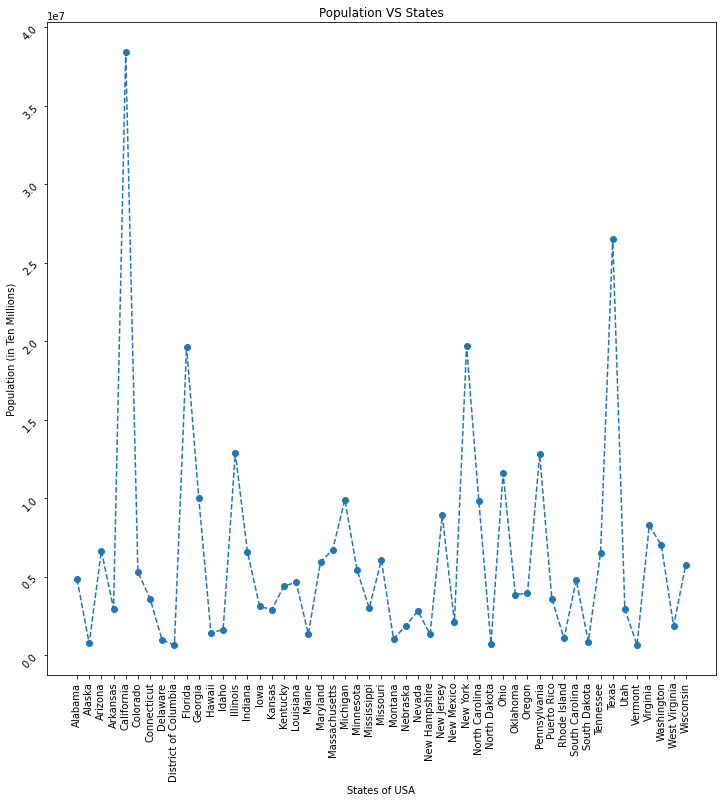

In [154]:
fig, ax = plt.subplots()
ax.plot(us_census['State'],us_census['TotalPop'],marker="o", linestyle="--")

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States of USA')
ax.set_ylabel('Population (in Ten Millions)')

fig.set_figheight(12)
fig.set_figwidth(12)

plt.title('Population VS States')
plt.show()

**
**Scatter Plot of Average Income in State VS Population of women in that state**
**

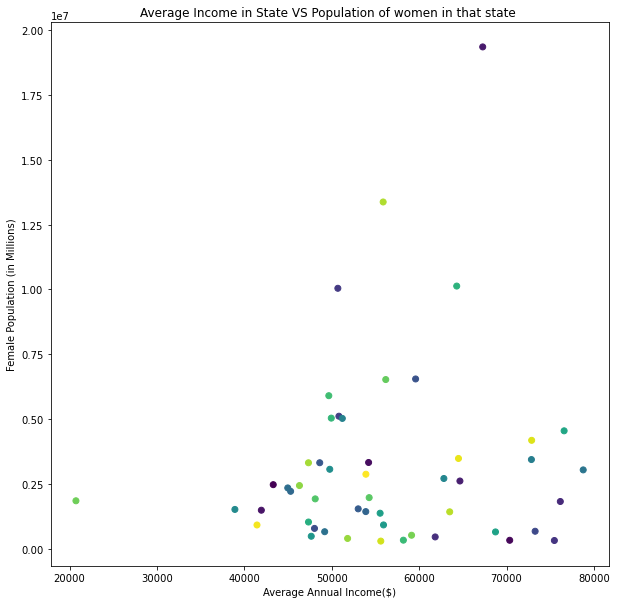

In [164]:
fig, ax = plt.subplots()
ax.scatter(x = us_census['Income'],y = us_census['Female_Pop'], c=us_census.index)

ax.set_xlabel('Average Annual Income($)')
ax.set_ylabel('Female Population (in Millions)')

fig.set_figheight(10)
fig.set_figwidth(10)

plt.title('Average Income in State VS Population of women in that state ')
plt.show()

**
**Scatter Plot for Average Income in State VS Proportion of Female Population**
**

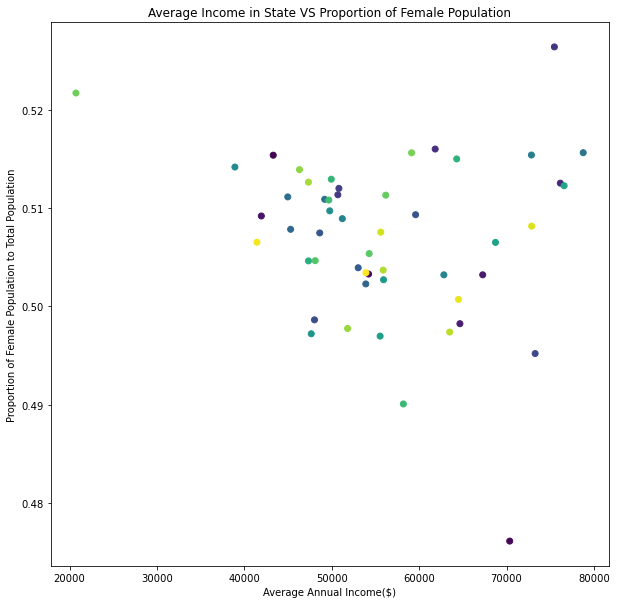

In [165]:
fig, ax = plt.subplots()
ax.scatter(x = us_census['Income'],y = us_census['Female_Pop']/us_census['TotalPop'], c=us_census.index)

ax.set_xlabel('Average Annual Income($)')
ax.set_ylabel('Proportion of Female Population to Total Population')

fig.set_figheight(10)
fig.set_figwidth(10)

plt.title('Average Income in State VS Proportion of Female Population')
plt.show()

**
**Histogram for Race's Population in States  **
**

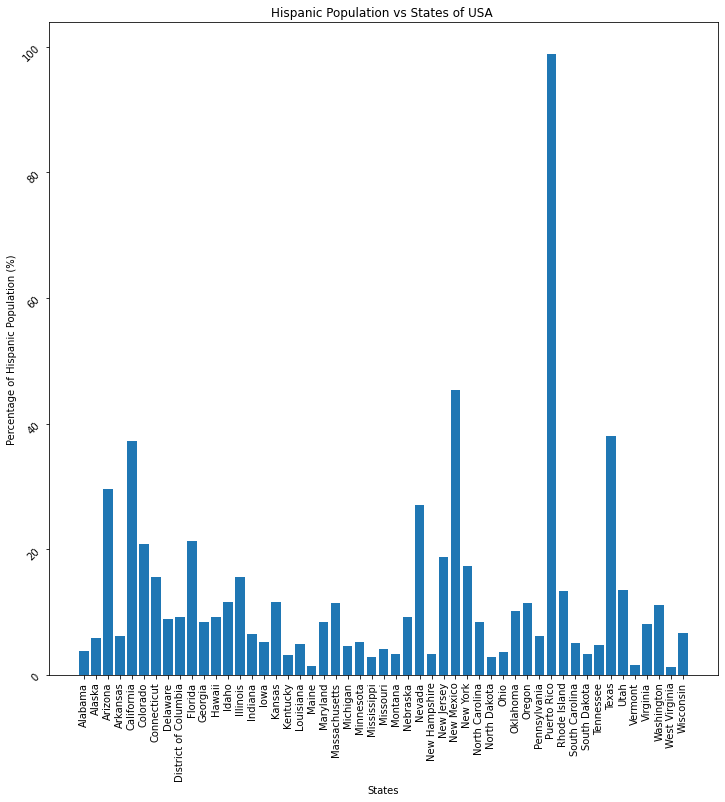

In [172]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Hispanic'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Hispanic Population (%)")

plt.title('Hispanic Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

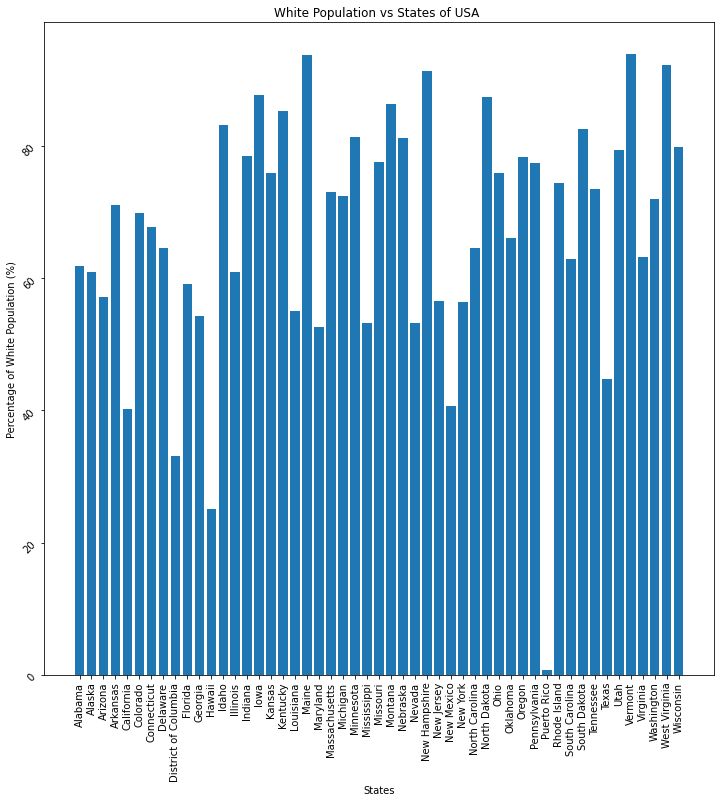

In [173]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['White'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of White Population (%)")

plt.title('White Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

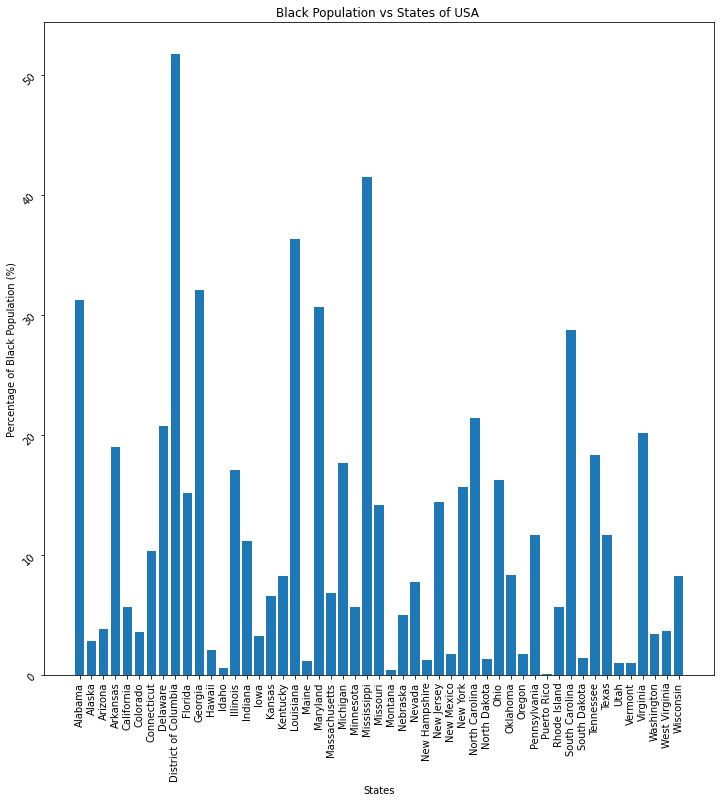

In [174]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Black'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Black Population (%)")

plt.title('Black Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

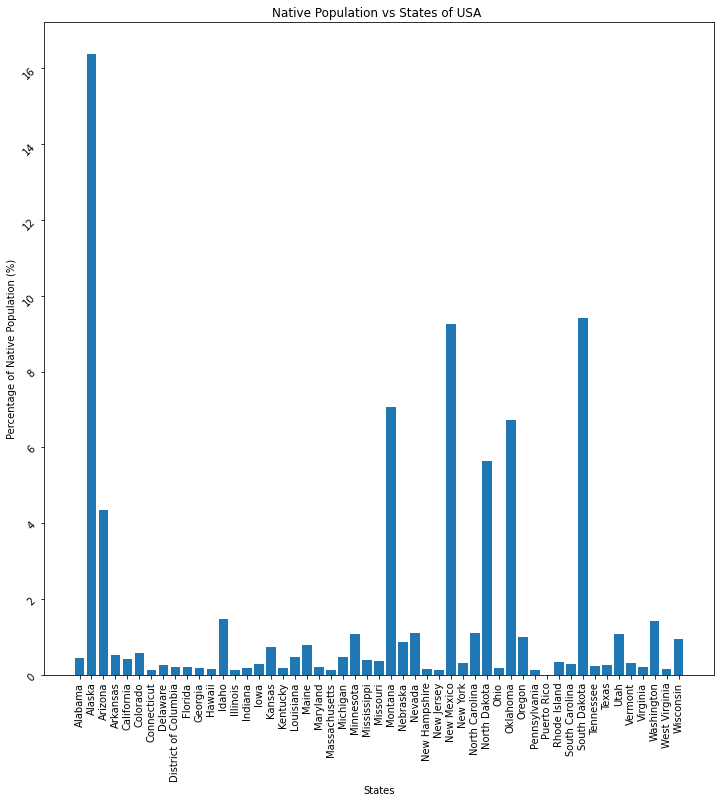

In [176]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Native'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Native Population (%)")

plt.title('Native Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

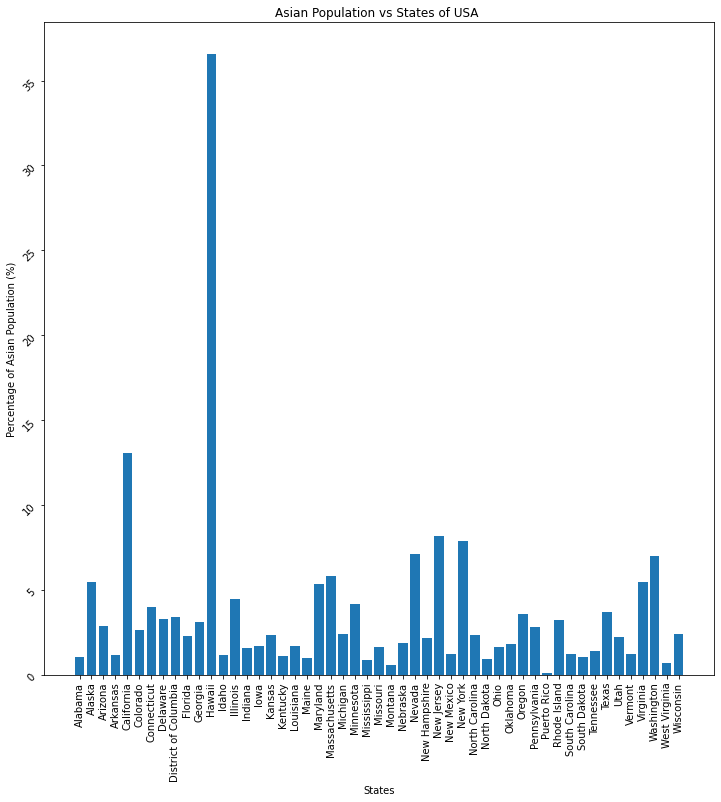

In [177]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Asian'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Asian Population (%)")

plt.title('Asian Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

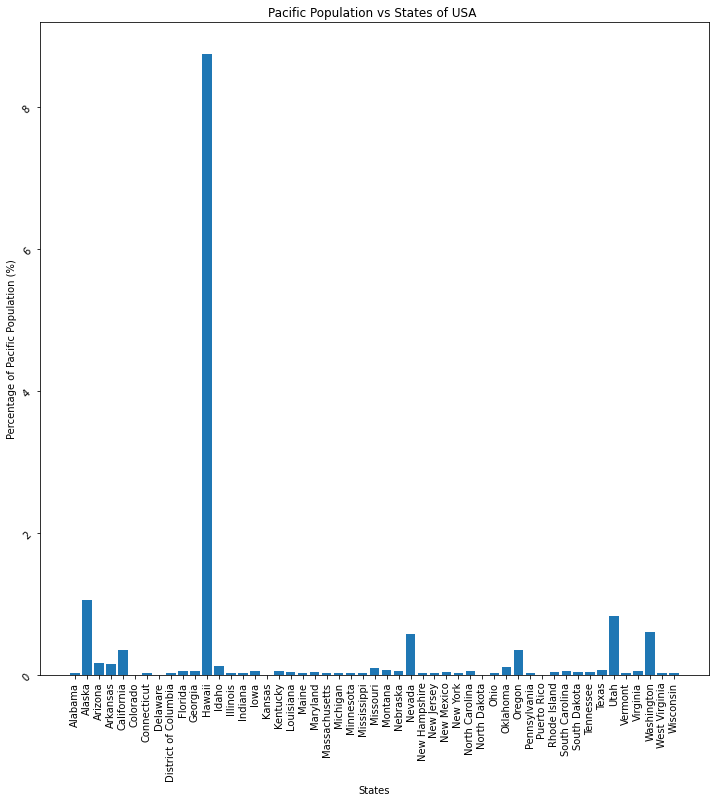

In [178]:
fig, ax = plt.subplots()
ax.bar(us_census['State'], us_census['Pacific'])

plt.xticks(us_census['State'], rotation=90)
plt.yticks(rotation=45)

ax.set_xlabel('States')
ax.set_ylabel("Percentage of Pacific Population (%)")

plt.title('Pacific Population vs States of USA ')

fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()